## 原版实现

In [2]:
import numpy as np
import collections
import heapq


class GridWithWeights:
    def __init__(self, width, height):
        self.weights = {}
        self.width = width
        self.height = height
        self.walls = []

    def cost(self, from_node, to_node):
        return self.weights.get(to_node, 1)

    def in_bounds(self, id):
        (x, y) = id
        return 0 <= x < self.width and 0 <= y < self.height

    def passable(self, id):
        return id not in self.walls

    def neighbors(self, id):
        (x, y) = id
        results = [(x + 1, y), (x, y - 1), (x - 1, y), (x, y + 1)]
        if (x + y) % 2 == 0:
            results.reverse()
        results = filter(self.in_bounds, results)
        results = filter(self.passable, results)
        return results


class PriorityQueue:
    def __init__(self):
        self.elements = []

    def empty(self):
        return len(self.elements) == 0

    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def get(self):
        return heapq.heappop(self.elements)[1]


def heuristic(a, b) -> float:
    "a,b: GridLocation"
    (x1, y1) = a
    (x2, y2) = b
    return abs(x1 - x2) + abs(y1 - y2)


def a_star_search(graph, start, goal):
    # graph: WeightedGraph, start: Location, goal: Location)
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}  # : Dict[Location, Optional[Location]]
    cost_so_far = {}  # : Dict[Location, float]
    came_from[start] = None
    cost_so_far[start] = 0

    while not frontier.empty():
        current = frontier.get()  # Location

        if current == goal:
            break

        for next in graph.neighbors(current):
            new_cost = cost_so_far[current] + graph.cost(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + heuristic(next, goal)
                frontier.put(next, priority)
                came_from[next] = current

    return came_from, cost_so_far

In [3]:
diagram4 = GridWithWeights(10, 10)
diagram4.walls = [(1, 7), (1, 8), (2, 7), (2, 8), (3, 7), (3, 8)]
diagram4.weights = {loc: 5 for loc in [(3, 4), (3, 5), (4, 1), (4, 2),
                                       (4, 3), (4, 4), (4, 5), (4, 6),
                                       (4, 7), (4, 8), (5, 1), (5, 2),
                                       (5, 3), (5, 4), (5, 5), (5, 6),
                                       (5, 7), (5, 8), (6, 2), (6, 3),
                                       (6, 4), (6, 5), (6, 6), (6, 7),
                                       (7, 3), (7, 4), (7, 5)]}

diagram0=GridWithWeights(30,15)
DIAGRAM1_WALLS = []
for i in range(3, 5):
    for j in range(3, 12):
        DIAGRAM1_WALLS.append((i, j))

for i in range(13, 15):
    for j in range(4, 15):
        DIAGRAM1_WALLS.append((i, j))

for i in range(21, 23):
    for j in range(0, 7):
        DIAGRAM1_WALLS.append((i, j))

for i in range(23, 26):
    for j in range(5, 7):
        DIAGRAM1_WALLS.append((i, j))

diagram0.walls=DIAGRAM1_WALLS

# utility functions for dealing with square grids
def from_id_width(id, width):
    return (id % width, id // width)


def draw_tile(graph, id, style):
    r = " . "
    if 'number' in style and id in style['number']:
        r = " %-2d" % style['number'][id]
    if 'point_to' in style and style['point_to'].get(id, None) is not None:
        (x1, y1) = id
        (x2, y2) = style['point_to'][id]
        if x2 == x1 + 1: r = " > "
        if x2 == x1 - 1: r = " < "
        if y2 == y1 + 1: r = " v "
        if y2 == y1 - 1: r = " ^ "
    if 'path' in style and id in style['path']: r = " @ "
    if 'start' in style and id == style['start']: r = " A "
    if 'goal' in style and id == style['goal']: r = " Z "
    if id in graph.walls: r = "###"
    return r


def draw_grid(graph, **style):
    print("___" * graph.width)
    for y in range(graph.height):
        for x in range(graph.width):
            print("%s" % draw_tile(graph, (x, y), style), end="")
        print()
    print("~~~" * graph.width)


start, goal = (1, 4), (8, 3)
came_from, cost_so_far = a_star_search(diagram0, start, goal)
draw_grid(diagram0, point_to=came_from, start=start, goal=goal)
print()

came_from, cost_so_far = a_star_search(diagram4, start, goal)
draw_grid(diagram4, point_to=came_from, start=start, goal=goal)
print()


__________________________________________________________________________________________
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . ###### .  .  .  .  .  .  . 
 .  v  v  v  v  v  v  v  v  .  .  .  .  .  .  .  .  .  .  .  . ###### .  .  .  .  .  .  . 
 v  v  v  <  <  <  <  <  <  <  .  .  .  .  .  .  .  .  .  .  . ###### .  .  .  .  .  .  . 
 >  v  < ###### ^  <  <  Z  .  .  .  .  .  .  .  .  .  .  .  . ###### .  .  .  .  .  .  . 
 >  A  < ###### ^  ^  ^  .  .  .  .  . ###### .  .  .  .  .  . ###### .  .  .  .  .  .  . 
 ^  ^  ^ ###### .  .  .  .  .  .  .  . ###### .  .  .  .  .  . ############### .  .  .  . 
 .  ^  ^ ###### .  .  .  .  .  .  .  . ###### .  .  .  .  .  . ############### .  .  .  . 
 .  .  . ###### .  .  .  .  .  .  .  . ###### .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  . ###### .  .  .  .  .  .  .  . ###### .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  . ###### .  .  .  .  .  .  .  . ###### .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 

## 改进实现

导入地图

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform, morphology
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
img = io.imread("./assets/map_original.png")
img = color.rgb2gray(img)
img = transform.resize(img, (500, 500))
img = img < 0.44
img = morphology.binary_closing(img)
img = morphology.binary_opening(img)
# plt.axis("off"), plt.gray()
# plt.xlim(0, img.shape[1])
# plt.ylim(0, img.shape[0])
# plt.imshow(img) # 得到一个 500x500 大小的地图

A star 算法实现

In [5]:
import numpy as np
import collections
import heapq


class GridWithWeights:
    def __init__(self, img: np.ndarray):
        # 图片矩阵先 y 后 x, 转置之后变成先 x 后 y
        self.maps=img.T # 存储障碍物信息 True or False
        self.width, self.height = self.maps.shape

    # 这里的设定比较简单, 因为 neighbor 选出来的移动目标只有上下左右, cost 恒为 1
    # 如果有更复杂的移动目标, 可以使用曼哈顿距离或者欧氏距离
    # 作者原版是使用字典存储 self.weights = {}, 适用于更一般的图
    # def cost(self, from_node, to_node):
    #     return self.weights.get(to_node, 1)

    def passable(self, id: tuple) -> bool:
        (x, y) = id
        return 0 <= x < self.width and 0 <= y < self.height and self.maps[x, y]

    def neighbors(self, id):
        (x, y) = id
        results = [(x + 1, y), (x - 1, y), (x, y - 1), (x, y + 1)]  # E W N S
        if (x + y) % 2 == 0:
            results.reverse()  # S N W E
        results = filter(self.passable, results)
        return results


class PriorityQueue:
    def __init__(self):
        self.elements = []

    def empty(self):
        return len(self.elements) == 0

    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def get(self):
        return heapq.heappop(self.elements)[1]

def heuristic(a, b) -> float:
    "a,b: GridLocation"
    (x1, y1) = a
    (x2, y2) = b
    return abs(x1 - x2) + abs(y1 - y2)


def a_star_search(graph: GridWithWeights, start: tuple, goal: tuple):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    shape = (graph.width, graph.height)
    came_from = np.ndarray(shape, dtype=tuple)
    cost_so_far = np.full(shape, np.inf, dtype=np.float16) # 未探索过的区域为无穷
    came_from[start] = None
    cost_so_far[start] = 0

    while not frontier.empty():
        current = frontier.get()  # Location

        if current == goal:
            print("success")
            break

        for next in graph.neighbors(current):
            # new_cost = cost_so_far[current] + graph.cost(current, next)
            new_cost = cost_so_far[current] + 1 # 由于这里只会上下左右移动, 简化
            if new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + heuristic(next, goal)
                frontier.put(next, priority)
                came_from[next] = current

    return came_from, cost_so_far


def reconstruct_path(came_from: np.ndarray, start: tuple, goal: tuple):
    current = goal
    path = []

    while current != start:
        path.append(current)
        current = came_from[current]
        # if current is None:
        #     raise ("看起来没有找到路径")

    path.append(start)
    path.reverse()
    return path

### 使用举例

success


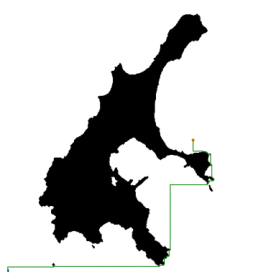

In [6]:
# A*
graph=GridWithWeights(img)
start, goal = (1, 4), (350, 250)
came_from, cost_so_far = a_star_search(graph, start, goal)

# 获得路径点
path = reconstruct_path(came_from, start, goal)

# 路径长度
# 由于只有上下左右四个方向, 所以
distance = len(path) -1

# 画图
plt.axis("off"), plt.gray()
plt.xlim(0, img.shape[1])
plt.ylim(0, img.shape[0])
plt.imshow(img)  # 得到一个 500x500 大小的地图

plt.scatter(start[0], start[1], s=5, marker="x")
plt.scatter(goal[0], goal[1], s=5, marker="x")

for i in path:
    plt.scatter(i[0], i[1], s=0.1, c="g", marker=".")
